# **Instalowanie potrzebnych komponentów**

In [ ]:
!pip install pulp

!sudo apt-get install coinor-cbc glpk-utils coinor-clp


# **Problem minimalizacji kosztu wynagrodzenia**
Rozplanowanie planu pracy tak by jak najmniej wypłacić pracownikom w danym tygodniu
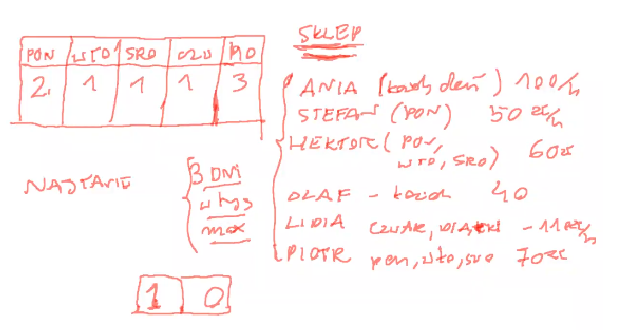

Znając ilość dostępnych pracowników, ich dostępne godziny pracy jak i ich stawkę za godzinę określić jaki grafik da najmniejszy koszt wynagrodzenia

In [ ]:
from pulp import *
import pandas as pd

pracownicy = ["Ania","Stefan","Hektor","Olaf","Lidia","Piotr"]
stawki = {"Ania":100,"Stefan":50,"Hektor":60,"Olaf":40,"Lidia":11,"Piotr":70}
dni_tyg = ["Poniedzialek","Wtorek","Sroda","Czwartek","piatek"]
min_w_dniu = {"Poniedzialek":2,"Wtorek":1,"Sroda":1,"Czwartek":1,"piatek":3}

plan_pracy = LpVariable.dicts("Plan_pracy", [(p,d) for p in pracownicy for d in dni_tyg],lowBound=0,upBound=1,cat='Integer')

prob = LpProblem("Minimalizacja_kosztu_pracy",LpMinimize)

prob += lpSum(4*[plan_pracy[pracownicy[0],d]*stawki[pracownicy[0]]
               + plan_pracy[pracownicy[1],d]*stawki[pracownicy[1]]
               + plan_pracy[pracownicy[2],d]*stawki[pracownicy[2]]
               + plan_pracy[pracownicy[3],d]*stawki[pracownicy[3]]
               + plan_pracy[pracownicy[4],d]*stawki[pracownicy[4]]
               + plan_pracy[pracownicy[5],d]*stawki[pracownicy[5]]
               for d in dni_tyg])

prob += plan_pracy[pracownicy[1],dni_tyg[1]] + plan_pracy[pracownicy[1],dni_tyg[2]] + plan_pracy[pracownicy[1],dni_tyg[3]] + plan_pracy[pracownicy[1],dni_tyg[4]] == 0, "Stefan: pon"
prob += plan_pracy[pracownicy[2],dni_tyg[3]] + plan_pracy[pracownicy[2],dni_tyg[4]] == 0, "Hektor: pon,wt,sr"
prob += plan_pracy[pracownicy[4],dni_tyg[0]]  + plan_pracy[pracownicy[4],dni_tyg[1]] + plan_pracy[pracownicy[4],dni_tyg[2]] == 0, "Lidia: czw,pio"
prob += plan_pracy[pracownicy[5],dni_tyg[3]] + plan_pracy[pracownicy[5],dni_tyg[4]] == 0, "Piotr: pon,wt,sr"

for d in dni_tyg:
  prob += plan_pracy[pracownicy[0],d] + plan_pracy[pracownicy[1],d] + plan_pracy[pracownicy[2],d] + plan_pracy[pracownicy[3],d] + plan_pracy[pracownicy[4],d] + plan_pracy[pracownicy[5],d] == min_w_dniu[d]

for p in pracownicy:
  prob += plan_pracy[p,dni_tyg[0]] + plan_pracy[p,dni_tyg[1]] + plan_pracy[p,dni_tyg[2]] + plan_pracy[p,dni_tyg[3]] + plan_pracy[p,dni_tyg[4]] <= 3
  prob += plan_pracy[p,dni_tyg[0]] + plan_pracy[p,dni_tyg[1]] + plan_pracy[p,dni_tyg[2]] + plan_pracy[p,dni_tyg[3]] + plan_pracy[p,dni_tyg[4]] >= 1

prob.writeLP("planPracy.lp")
prob.solve()

print("Status:", LpStatus[prob.status])
print("Koszt wynagrodzeń w tygodniu = ",value(prob.objective) ,"zl",end="\n\n")

df = pd.DataFrame(list(zip(pracownicy,[int(plan_pracy[p,dni_tyg[0]].varValue) for p in pracownicy],
                           [int(plan_pracy[p,dni_tyg[1]].varValue) for p in pracownicy],
                           [int(plan_pracy[p,dni_tyg[2]].varValue) for p in pracownicy],
                           [int(plan_pracy[p,dni_tyg[3]].varValue) for p in pracownicy],
                           [int(plan_pracy[p,dni_tyg[4]].varValue) for p in pracownicy])),
                  columns = [[" "]+dni_tyg])

df

Status: Optimal
Koszt wynagrodzeń w tygodniu =  1528.0 zl



,,Poniedzialek,Wtorek,Sroda,Czwartek,piatek
0,Ania,0,0,0,0,1
1,Stefan,1,0,0,0,0
2,Hektor,0,1,0,0,0
3,Olaf,1,0,0,0,1
4,Lidia,0,0,0,1,1
5,Piotr,0,0,1,0,0
